In [5]:
import os
from os.path import isdir
from unittest import TestCase

from PIL import Image

import struct
from codecs import decode
from scipy.misc import toimage
import numpy as np
import os
import matplotlib.pyplot as plt
import _pickle as pickle


# Import online data

In [6]:
data_dir = "/mnt/DATA/lupin/Dataset/CASIA_extracted/"
list_files = os.listdir(data_dir)

chars, lbls = [], []
CHAR, LB = [],[]
for file in list_files:
    if file[-4:] == '.txt':
        with open(data_dir + file, "rb") as f:
            emp = pickle.load(f)
                  
            if file[-9:-4] ==  '_lbls':
                lbls.append(emp)
                LB += emp
            else:
                chars.append(emp)   
                CHAR += emp

In [7]:
def plot_char(char):
    fig = plt.figure()
    ax = plt.axes()

    for i in range(len(char)):
        x,y = zip(*char[i])
        plt.plot(x,y)
    plt.axes().set_aspect('equal', 'datalim')
    plt.show()

In [8]:
index = 3000
id_per = 1
len(lbls[id_per])

3489

/mnt/DATA/lupin/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


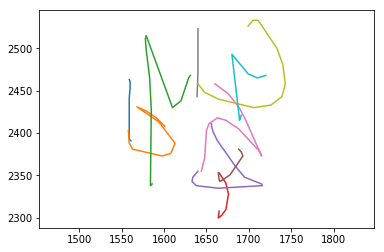

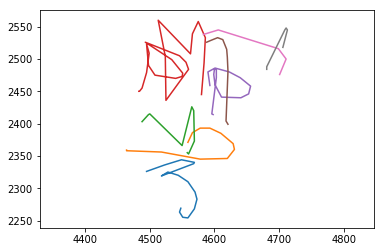

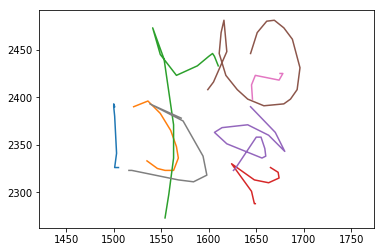

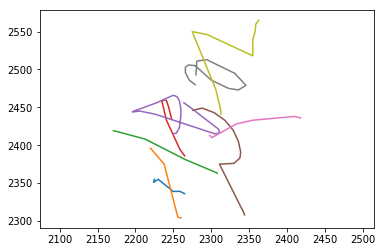

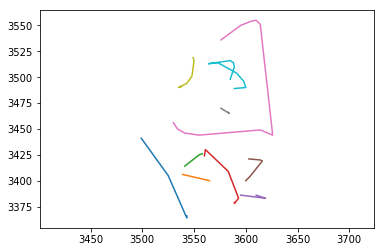

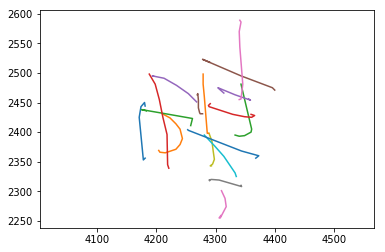

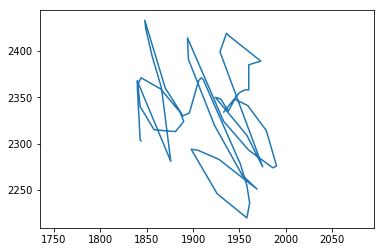

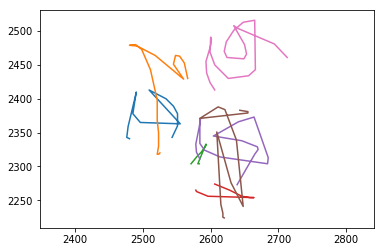

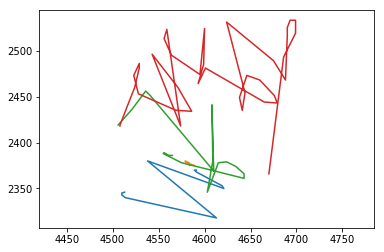

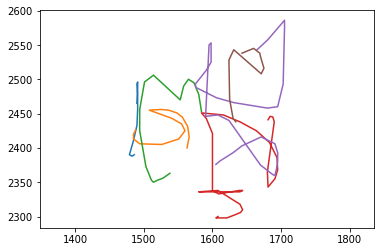

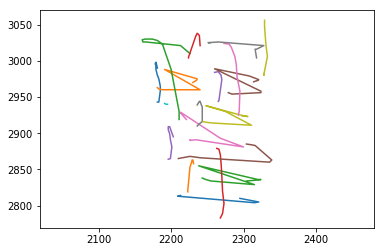

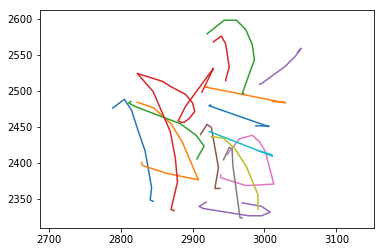

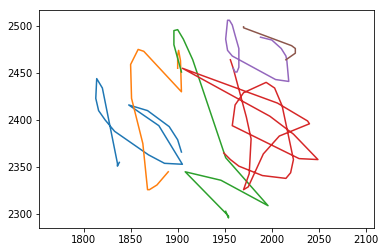

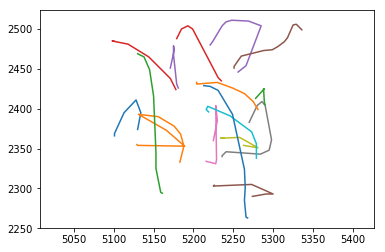

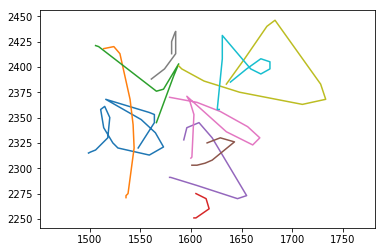

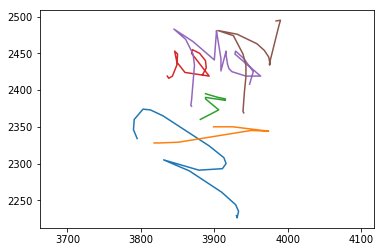

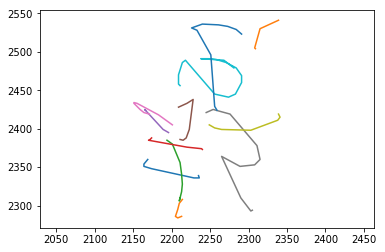

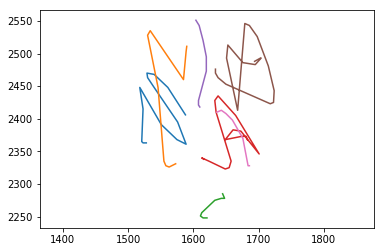

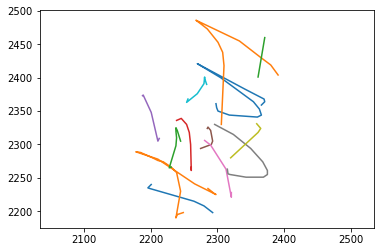

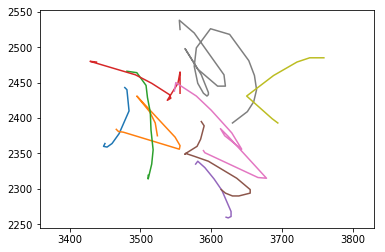

'螭'

In [9]:
for i in range(20):
    plot_char(chars[i][index])
lbls[id_per][index]

# Filter characters with non label

In [10]:
index = [i for i,x in enumerate(LB) if x=='']
len(CHAR)

69654

In [11]:
for i in sorted(index, reverse=True):
    del CHAR[i]
    del LB[i]

# Line extraction

In [12]:
def pts2lines(CHAR):
    # input: CHAR[char[stroke[x,y]]]
    Lines = []
    for char in CHAR:
        Line = []
        for s in range(len(char)):
            Stroke = []
            for i in range(len(char[s])-1):
                x1 = char[s][i][0]
                x2 = char[s][i+1][0]
                y1 = char[s][i][1]
                y2 = char[s][i+1][1]
                
                Stroke.append([x1, x2 ,y1, y2])
                
            Line.append(Stroke)
            
        Lines.append(Line)
        
    return Lines   # [x1, x2 ,y1, y2]

def normalize(Lines):
    
    for c in range(len(Lines)):       # char: LInes[c]
        
        for s in range(len(Lines[c])):  # stroke: Lines[c][s]
            Length = []
            px, py = [], []
            
            for l in range(len(Lines[c][s])): # line: Lines[c][s][l]
                x1 = Lines[c][s][l][0]
                x2 = Lines[c][s][l][1]
                y1 = Lines[c][s][l][2]
                y2 = Lines[c][s][l][3]
                
                Length[l] = np.sqrt((x1-x2)**2 + (y1-y2)**2)
                
                px[l] = 1/2*Length*(x1+x2)
                py[l] = 1/2*Length*(y1+y2)
                
                dxL = 1/3*Length[l]*((x2 - ))
                
            mux = np.sum(px)/np.sum(Length)
            muy = np.sum(py)/np.sum(Length)
            
            for l in range(len(Lines[c][s])): # line: Lines[c][s][l]
                x1 = Lines[c][s][l]
                x2 = char[s][i+1][0]
                y1 = char[s][i][1]
                y2 = char[s][i+1][1]
                
                Length[l] = np.sqrt((x1-x2)**2 + (y1-y2)**2)
                
                px[l] = 1/2*Length*(x1+x2)
                py[l] = 1/2*Length*(y1+y2)
                
                dxL = 1/3*Length[l]*((x2 - ))
            
                
                
            
            
            
        
    
    
            

def extract_line(CHAR):
    # Lines: chars
    Lines = []
    for char in CHAR:
        Line = []
        for s in range(len(char)):
            if s == len(char)-1:
                for i in range(len(char[s])-1):   
                    if i == len(char[s])-2:
                        x = char[s][i][0]
                        y = char[s][i][1]
                        dx = char[s][i+1][0] - char[s][i][0]
                        dy = char[s][i+1][1] - char[s][i][1]
                        s1 = 1
                        s2 = 0
                    else:
                        x = char[s][i][0]
                        y = char[s][i][1]
                        dx = char[s][i+1][0] - char[s][i][0]
                        dy = char[s][i+1][1] - char[s][i][1]
                        s1 = 1
                        s2 = 0
                    
                    Line.append([x, y ,dx, dy, s1, s2])

            else:
                for i in range(len(char[s])): 
                    if i == len(char[s])-1 :
                        x = char[s][i][0]
                        y = char[s][i][1]
                        dx = char[s+1][0][0] - char[s][i][0]
                        dy = char[s+1][0][1] - char[s][i][1]
                        s1 = 0
                        s2 = 1
                    else:
                        x = char[s][i][0]
                        y = char[s][i][1]
                        dx = char[s][i+1][0] - char[s][i][0]
                        dy = char[s][i+1][1] - char[s][i][1]
                        s1 = 1
                        s2 = 0
                    Line.append([x, y ,dx, dy, s1, s2])
                    
        Lines.append(Line)    
    return Lines

In [13]:
# Test function line extraction
a = [[[(1,1), (2,2)],[(2,4), (3,5)]] , [[(0,1), (4,2), (-1,0)],[(2,-2), (3,-1)]]]
l = extract_line(a)
l

[[[1, 1, 1, 1, 1, 0], [2, 2, 0, 2, 0, 1], [2, 4, 1, 1, 1, 0]],
 [[0, 1, 4, 1, 1, 0],
  [4, 2, -5, -2, 1, 0],
  [-1, 0, 3, -2, 0, 1],
  [2, -2, 1, 1, 1, 0]]]

In [14]:
Lines = pts2lines(CHAR)

In [15]:
Lines = normalize(Lines[:3])

[569, 570, 1203, 1203]
[570, 573, 1203, 1203]
[573, 574, 1203, 1205]
[574, 575, 1205, 1208]
[575, 575, 1208, 1214]
[575, 575, 1214, 1220]
[575, 576, 1220, 1235]
[576, 575, 1235, 1250]
[575, 574, 1250, 1260]
[574, 574, 1260, 1274]
[574, 574, 1274, 1283]
[574, 575, 1283, 1288]
[575, 575, 1288, 1293]
[575, 575, 1293, 1293]
[575, 575, 1293, 1293]
[575, 575, 1293, 1293]
[575, 575, 1293, 1293]
[575, 575, 1293, 1293]
[575, 574, 1293, 1295]
[574, 574, 1295, 1296]
[574, 574, 1296, 1296]
[574, 571, 1296, 1295]
[571, 570, 1295, 1291]
[560, 564, 1343, 1345]
[564, 570, 1345, 1348]
[570, 576, 1348, 1356]
[576, 573, 1356, 1346]
[573, 570, 1346, 1346]
[570, 566, 1346, 1343]
[868, 873, 1200, 1204]
[873, 871, 1204, 1210]
[871, 858, 1210, 1235]
[858, 854, 1235, 1238]
[854, 853, 1238, 1239]
[913, 918, 1198, 1199]
[918, 920, 1199, 1200]
[920, 921, 1200, 1203]
[921, 921, 1203, 1205]
[921, 921, 1205, 1210]
[921, 896, 1210, 1240]
[896, 893, 1240, 1243]
[893, 893, 1243, 1238]
[1168, 1171, 1270, 1269]
[1171, 12

In [102]:
CHAR

[[[(569, 1203),
   (570, 1203),
   (573, 1203),
   (574, 1205),
   (575, 1208),
   (575, 1214),
   (575, 1220),
   (576, 1235),
   (575, 1250),
   (574, 1260),
   (574, 1274),
   (574, 1283),
   (575, 1288),
   (575, 1293),
   (575, 1293),
   (575, 1293),
   (575, 1293),
   (575, 1293),
   (575, 1293),
   (574, 1295),
   (574, 1296),
   (574, 1296),
   (571, 1295),
   (570, 1291)],
  [(560, 1343),
   (564, 1345),
   (570, 1348),
   (576, 1356),
   (573, 1346),
   (570, 1346),
   (566, 1343)]],
 [[(868, 1200),
   (873, 1204),
   (871, 1210),
   (858, 1235),
   (854, 1238),
   (853, 1239)],
  [(913, 1198),
   (918, 1199),
   (920, 1200),
   (921, 1203),
   (921, 1205),
   (921, 1210),
   (896, 1240),
   (893, 1243),
   (893, 1238)]],
 [[(1168, 1270), (1171, 1269), (1260, 1259), (1248, 1260), (1234, 1260)],
  [(1156, 1315),
   (1158, 1315),
   (1169, 1313),
   (1258, 1298),
   (1254, 1298),
   (1245, 1300)],
  [(1199, 1240),
   (1200, 1240),
   (1200, 1250),
   (1198, 1270),
   (1184, 133